1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

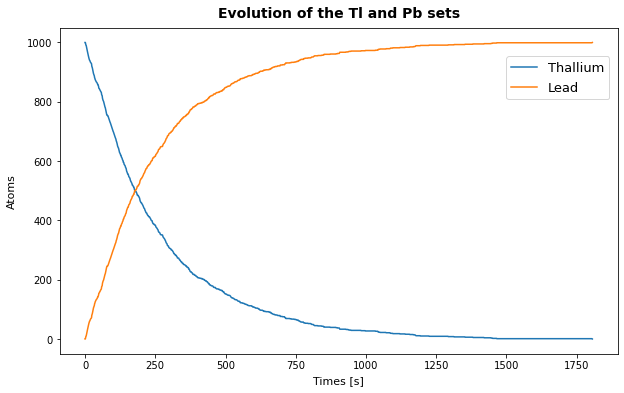

In [2]:
#first method
np.random.seed(123)

def p_decay(t,tau):
    return 1-2**(-t/tau)

tau = 3.052 * 60
thallium = 1000
lead = 0

#unifrom probability samples
fig = plt.figure(figsize=(10, 6))
samples = np.random.uniform(size = thallium)


thallium_decay = [thallium]
lead_decay = [lead]
t = 0 #time
while(thallium != 0):
    samples = samples[samples>p_decay(t,tau)]
    thallium = len(samples)
    lead = 1000 - thallium
    thallium_decay.append(thallium)
    lead_decay.append(lead)
    t += 1

#plot Tl and Pb sets
x = np.arange(0,len(thallium_decay),1)
plt.plot(x, thallium_decay, label ="Thallium")
plt.plot(x, lead_decay, label ="Lead")
plt.title('Evolution of the Tl and Pb sets', fontsize=14,  fontweight ="bold", pad=10)
plt.xlabel('Times [s]',size = 11, labelpad=5)
plt.ylabel('Atoms',size = 11, labelpad=10)
plt.legend(loc=(0.80, 0.78), fontsize=13)

plt.show()

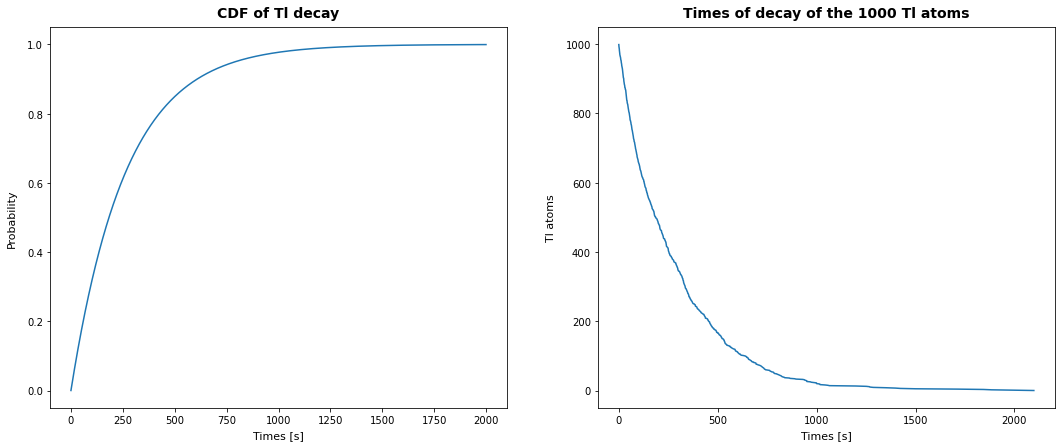

In [3]:
#second method

def decay_pdf(t):
    tau = 3.052 * 60
    return (2**(-t/tau))*(np.log(2)/tau)

def expon_cdf(x, tau):
    """CDF of exponetial distribution."""
    return (1 - 2**(-x/tau))

def expon_icdf(p, tau):
    """Inverse CDF of exponential distribution"""
    return -tau*np.log2(1 - p)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

x = np.arange(0,2000,1)
ax1.plot(x,expon_cdf(x,tau))
ax1.set_title('CDF of Tl decay', fontsize=14,  fontweight ="bold", pad=10)
ax1.set_xlabel('Times [s]',size = 11, labelpad=5)
ax1.set_ylabel('Probability',size = 11, labelpad=10)

# apply the inverse of the inverse transform method
n = 1000
u = np.random.random(n)
v = expon_icdf(u,tau)  #apply the inverse of the CDF
decay = np.sort(v)[::-1]
x = np.arange(0,len(decay),1)
ax2.plot(decay,x)
ax2.set_title('Times of decay of the 1000 Tl atoms', fontsize=14,  fontweight ="bold", pad=10)
ax2.set_xlabel('Times [s]',size = 11, labelpad=5)
ax2.set_ylabel('Tl atoms',size = 11, labelpad=10)

plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

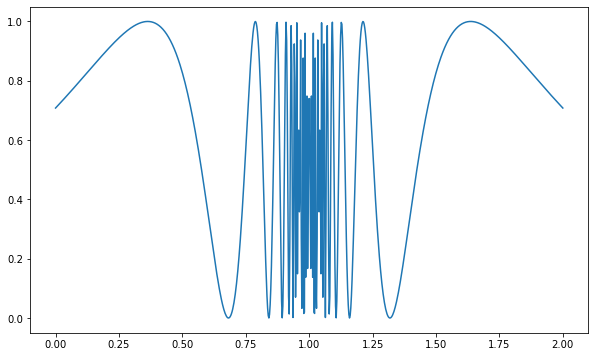

In [4]:
#plot function
def f(x):
    return np.sin(1/(1-x))**2

fig = plt.figure(figsize=(10, 6))             
x = np.linspace(0,2,800)
plt.plot(x,f(x))

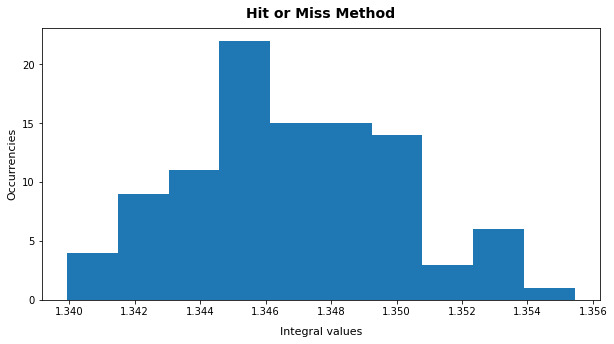

Integral estimation with hit/miss method: 1.34680 +- 0.00032


In [5]:
np.random.seed(123)

#Monte Carlo integration with hit or miss
integrals = []
A = 2
    
N = 100
for i in range(N): #repeat integral N times for a better estimation
    points = 10**5
    count = 0
    for i in range(points):
        x = 2 * np.random.uniform() # x is random uniform between 0 and 2 
        y = np.random.uniform()     # y is random uniform between 0 and 1
        if y < f(x): 
            count += 1
    I = A * count / points
    integrals.append(I)
    
#plot
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.hist(integrals,bins=10)
ax1.set_title('Hit or Miss Method', fontsize=14,  fontweight ="bold", pad=10)
ax1.set_ylabel('Occurrencies',size = 11, labelpad=5)
ax1.set_xlabel('Integral values',size = 11, labelpad=10)
plt.show()

print("Integral estimation with hit/miss method: %.5f +- %.5f"% (np.mean(integrals),np.std(integrals)/(np.sqrt(N))))

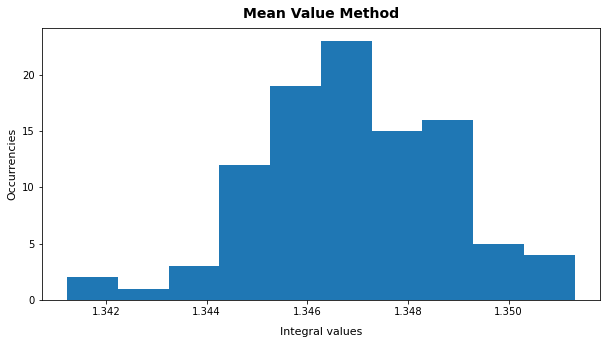

Integral estimation with mean value method: 1.34691 +- 0.00019

The two methods gives a very similar result.


In [6]:
np.random.seed(12346)

#Monte Carlo integration with mean value method
integrals = []
N = 100
A = 2

for i in range(N): #repeat integral N times for a better estimation
    points = 10**5
    summation = 0
    for i in range(points):
        x = 2 * np.random.uniform()
        y = f(x)
        summation +=y
    I = A*summation/points
    integrals.append(I)
    
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.hist(integrals,bins=10)
ax1.set_title('Mean Value Method', fontsize=14,  fontweight ="bold", pad=10)
ax1.set_ylabel('Occurrencies',size = 11, labelpad=5)
ax1.set_xlabel('Integral values',size = 11, labelpad=10)
plt.show()
print("Integral estimation with mean value method: %.5f +- %.5f" % (np.mean(integrals), np.std(integrals)/np.sqrt(N)))

print("\033[1m\nThe two methods gives a very similar result.")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
np.random.seed(12345)

def volume(dim,N):
    V = 2**dim
    count = 0
    for i in range(N):
        x = (2*np.random.uniform(size=dim))-1
        norm = np.linalg.norm(x)
        if (norm <= 1):
            count +=1
    #calculate integral
    I = V * count / N
    return I
        
V2 = volume(2,N=10**5)
print("\033[1mThe area of the circle is: %.5f " %(V2))  

V10 = volume(10,N=10**5)
print("The volume of the 10D sphere is: %.5f " %(V10)) 

The area of the circle is: 3.13692 
The volume of the 10D sphere is: 2.52928 


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
import scipy as sc
from scipy import stats
np.random.seed(123)

def f(x): 
    return np.power(x,-1/2)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

#generate a distribution of random points according to the weight function
N = 10**3
y = stats.powerlaw.rvs(0.5,size=N)

#calculate the normalization factor
w_int = sc.integrate.quad(w,0,1)[0]

#calculate the integral
I = 1/N * np.sum(f(y)/w(y))*w_int
print("\033[1mThe value of the integral is:",I)


The value of the integral is: 0.8402710091666383
